Import Libraries

In [ ]:
# data manipulation and analysis, particularly with tabular data (dataframes).
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Load Data Set

In [ ]:
df = pd.read_csv("/content/Housing.csv")

first five

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Unique values

In [ ]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


Pre-Procesing

checking null values

In [ ]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Checking Outliers

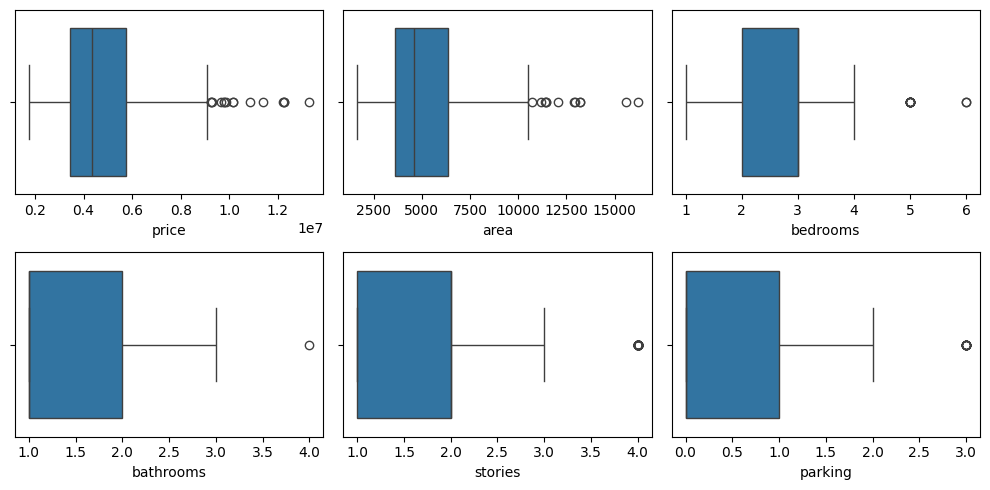

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes objects
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plot boxplots on the individual axes
sns.boxplot(x=df['price'], ax=axs[0, 0])
sns.boxplot(x=df['area'], ax=axs[0, 1])
sns.boxplot(x=df['bedrooms'], ax=axs[0, 2])
sns.boxplot(x=df['bathrooms'], ax=axs[1, 0])
sns.boxplot(x=df['stories'], ax=axs[1, 1])
sns.boxplot(x=df['parking'], ax=axs[1, 2])

# Adjust layout to prevent overlap(space)
plt.tight_layout()

# Display the plot
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x77fee6d3e380>,
 'caps': [<matplotlib.lines.Line2D at 0x77fee6d3e8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fee6d3e0e0>],
 'medians': [<matplotlib.lines.Line2D at 0x77fee6d3ee00>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fee6d3f0a0>],
 'means': []}

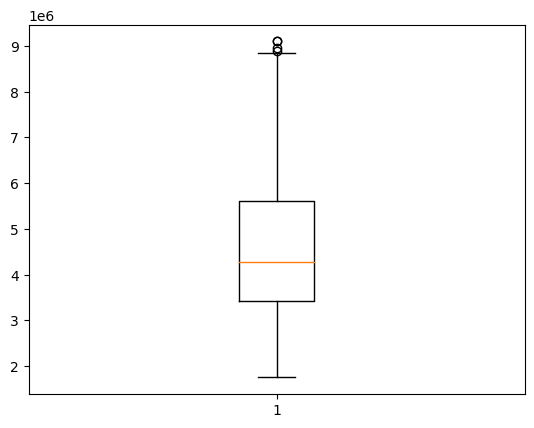

In [ ]:
# outlier Treatment
# Price and area have considerable outliers.
# we can drop the outliers as we have sufficient data.

# outlier treatment for price
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
plt.boxplot(df.price)
#plot after outlier removal

{'whiskers': [<matplotlib.lines.Line2D at 0x77fee6bc5330>,
 'caps': [<matplotlib.lines.Line2D at 0x77fee6bc5870>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fee6bc5090>],
 'medians': [<matplotlib.lines.Line2D at 0x77fee6bc5db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fee6bc6050>],
 'means': []}

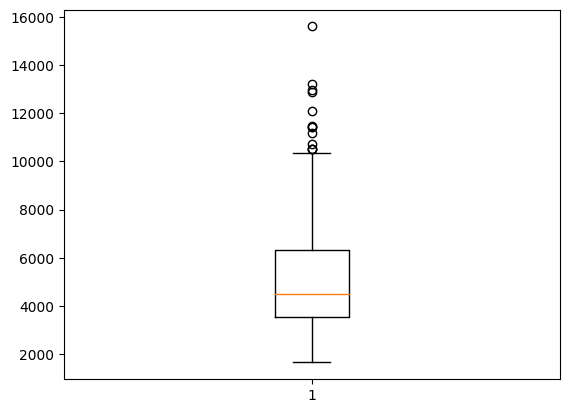

In [ ]:
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
housing = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

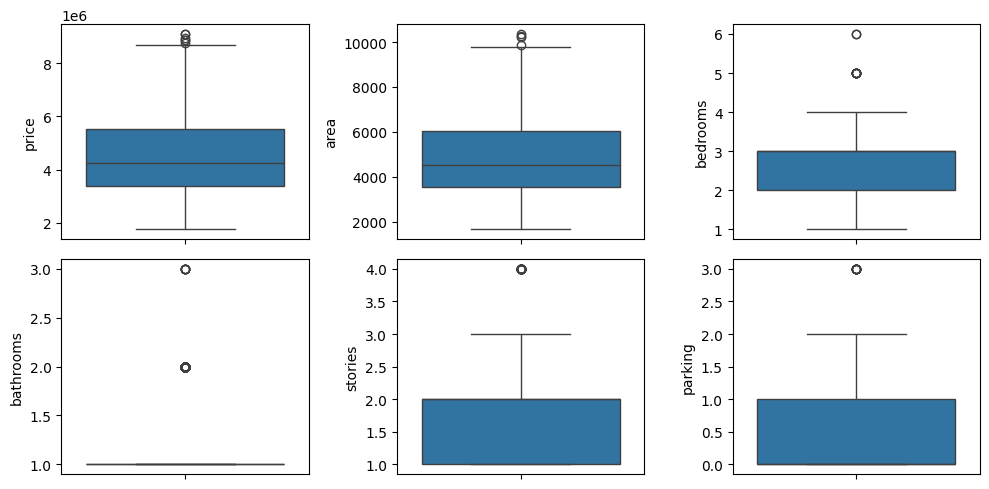

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

Data duplication

Data Visualisations


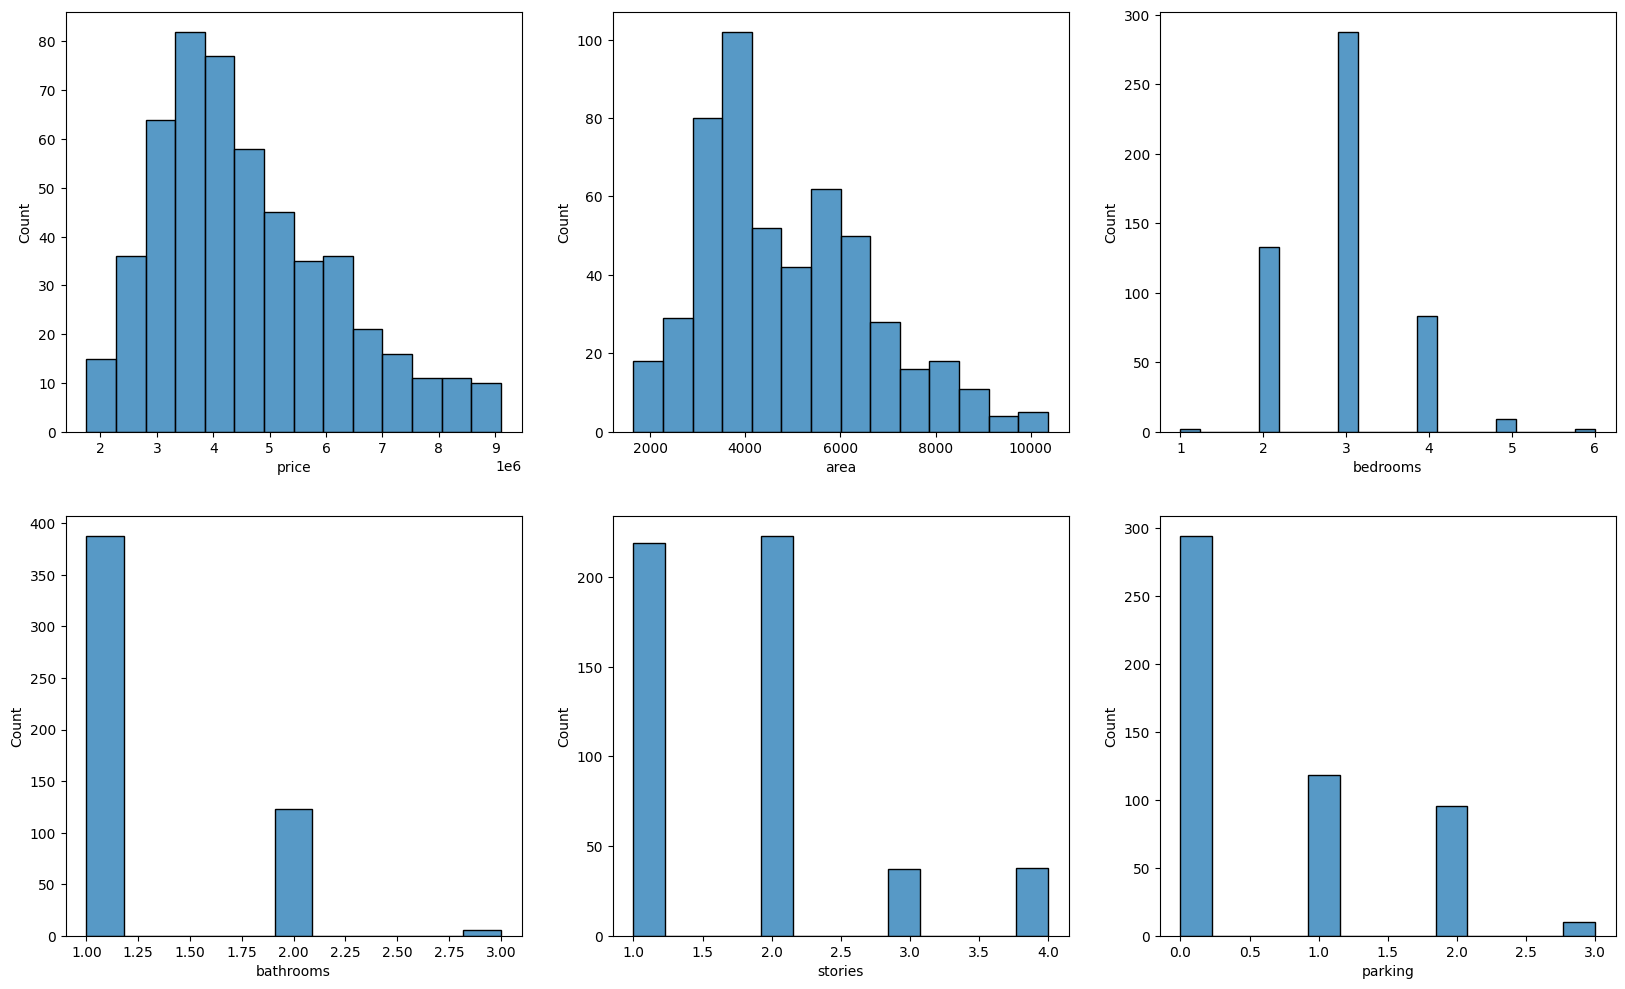

In [ ]:
plt.figure(figsize = (20, 12))
plt.subplot(2,3,1)
sns.histplot(housing['price'])
plt.subplot(2,3,2)
sns.histplot(housing['area'])
plt.subplot(2,3,3)
sns.histplot(housing['bedrooms'])
plt.subplot(2,3,4)
sns.histplot(housing['bathrooms'])
plt.subplot(2,3,5)
sns.histplot(housing['stories'])
plt.subplot(2,3,6)
sns.histplot(housing['parking'])
plt.show()

Data splitting

In [ ]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)

Encoding

In [ ]:
label_encoder_list = []

for col in df_train.columns:
    if df_train[col].dtype == "object" or df_train[col].dtype.name == "category":
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
        df_test[col] = le.transform(df_test[col])
        label_encoder_list.append(le)

Feature Scaling

In [ ]:
# we use StandardScaler becasue StandardScaler works best in machine learning models like linear regreesion, logistic regression etc.
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' variables
num_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


Data Splitting

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

Algorithm - Linear Regression

In [ ]:
a= LinearRegression()
a.fit(X_train, y_train)

LinearRegression()

Model Evaluation(Dividing into X_test and y_test)

In [ ]:
y_test = df_test.pop('price')
X_test = df_test


In [ ]:
 #Making predictions
y_pred = a.predict(X_test)

# evaluate the model
print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 : ", r2_score(y_test, y_pred))


MSE :  0.3605107626881419
r2 :  0.6394892373118581


# Plotting y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_pred')

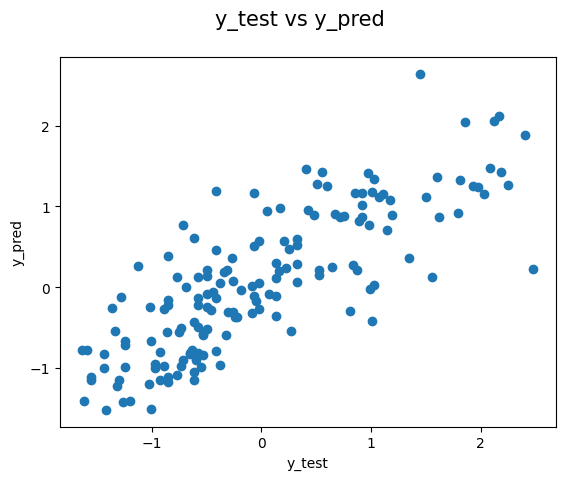

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred, )
fig.suptitle('y_test vs y_pred', fontsize=15)              # Plot heading
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)

In [58]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Housing.csv')

# Generate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'yes'

In [ ]:

import pandas as pd
# Assuming df is your original dataset
df_encoded = pd.get_dummies(df)
df_encoded = pd.read_csv('/content/Housing.csv')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt



# Preprocess the data (Convert categorical variables to numerical)
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Housing.csv")

# Preprocess the data (Convert categorical variables to numerical)
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature variables (X) and the target variable (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Machine model
model = SVR(kernel='linear')  # You can also try 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared score (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")
